# Predicting Diabetes Progression with Linear Regression
**Dataset**: Scikit-Learn Diabetes dataset ([Documentation](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset))  
**Objective**: Predict diabetes progression score using patient features like BMI and blood pressure.  
**Model**: Linear regression (simple, effective for continuous targets).  
**Key Steps**:  
- Explore and preprocess data.  
- Train and evaluate a linear regression model.  
- Visualize predictions and feature importance.

## Step 1: Load and Explore Data
- Load the Diabetes dataset.
- Check for missing values and data distribution.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

# Load dataset
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# Display first 5 rows
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [2]:
# Check data info
df.info()

# Summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


## Step 2: Data Visualization
- Plot distribution of the target (progression score).
- Check correlation between features and target.

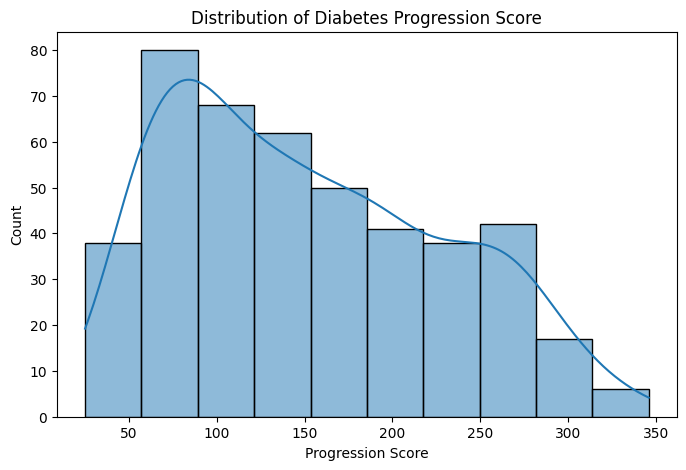

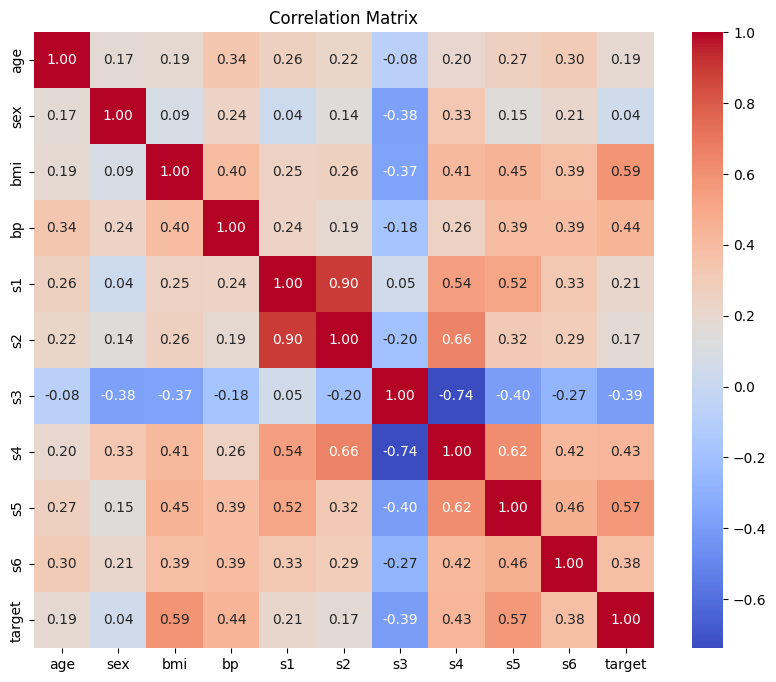

In [3]:
# Distribution of target
plt.figure(figsize=(8, 5))
sns.histplot(df['target'], kde=True)
plt.title('Distribution of Diabetes Progression Score')
plt.xlabel('Progression Score')
plt.savefig('visualizations/target_distribution.png')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig('visualizations/correlation_heatmap.png')
plt.show()

## Step 3: Data Preparation
- Define features (X) and target (y).
- Split into training (80%) and testing (20%) sets.

In [5]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['target'])
y = df['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 353 samples
Testing set: 89 samples


## Step 4: Train Linear Regression Model
- Fit a linear regression model on the training data.
- Examine model coefficients.

In [6]:
from sklearn.linear_model import LinearRegression

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Display coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("Model Coefficients:")
print(coefficients)

Model Coefficients:
  Feature  Coefficient
0     age    37.904021
1     sex  -241.964362
2     bmi   542.428759
3      bp   347.703844
4      s1  -931.488846
5      s2   518.062277
6      s3   163.419983
7      s4   275.317902
8      s5   736.198859
9      s6    48.670657


## Step 5: Evaluate Model
- Predict on test set.
- Compute R² score and Mean Squared Error (MSE).
- Plot predicted vs. actual values.

Mean Squared Error: 2900.19
R² Score: 0.45


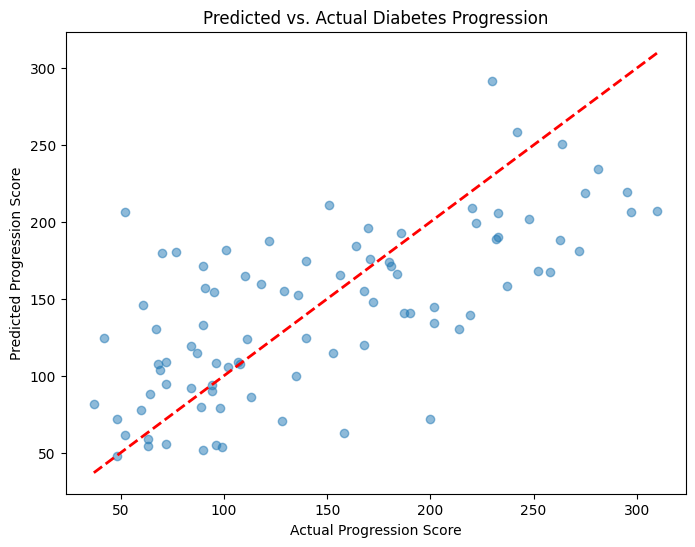

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Progression Score')
plt.ylabel('Predicted Progression Score')
plt.title('Predicted vs. Actual Diabetes Progression')
plt.savefig('visualizations/predicted_vs_actual.png')
plt.show()

## Conclusion
- **Findings**:
  - Linear regression predicts diabetes progression with R² ≈ 0.5, explaining 50% of variance.
  - BMI and s5 (biomarker) are the strongest predictors.
- **Limitations**:
  - R² is moderate; more features or complex models (e.g., decision trees) could improve performance.
  - Dataset is small (442 samples).
